In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# importing data
trap_GSD_original = pd.read_csv('trap_originalGSD_data_boxplots.csv')
wc_GSD_original = pd.read_csv('water_originalGSD_data_boxplots.csv')
trap_GSD_new = pd.read_csv('trap_newGSD_data_boxplots.csv')
wc_GSD_new = pd.read_csv('water_newGSD_data_boxplots.csv')

Calculations and data transformation

In [2]:
# cleaning data
#trap_GSD_original.dropna(inplace=True) # drop rows with missing values
#trap_GSD_new.dropna(inplace=True) 
#wc_GSD_original.dropna(inplace=True)
#wc_GSD_new.dropna(inplace=True)

# calculations 
trap_GSD_original['SM/SP'] = trap_GSD_original['sm_weight'] / trap_GSD_original['sp_weight']
trap_GSD_original['SP/SM'] = trap_GSD_original['sp_weight'] / trap_GSD_original['sm_weight']
trap_GSD_new['SM/SP'] = trap_GSD_new['sm_weight'] / trap_GSD_new['sp_weight']
trap_GSD_new['SP/SM'] = trap_GSD_new['sp_weight'] / trap_GSD_new['sm_weight']

# replace grain size values
trap_GSD_original['grain_size'] = trap_GSD_original['grain_size'].replace({
    'CS': 'Coarse Sand',
    'FS': 'Fine Sand',
    'S': 'Silt',
    'C': 'Clay'
})
trap_GSD_new['grain_size'] = trap_GSD_new['grain_size'].replace({
    'CS': 'Coarse Sand',
    'FS': 'Fine Sand',
    'S': 'Silt',
    'C': 'Clay'
})
wc_GSD_original['grain_size'] = wc_GSD_original['grain_size'].replace({
    'CS': 'Coarse Sand',
    'FS': 'Fine Sand',
    'S': 'Silt',
    'C': 'Clay'
})
wc_GSD_new['grain_size'] = wc_GSD_new['grain_size'].replace({
    'FS': 'Fine Sand',
    'S': 'Silt',
    'C': 'Clay'
})

### Boxplots: Original Size Range

#### Sediment Traps

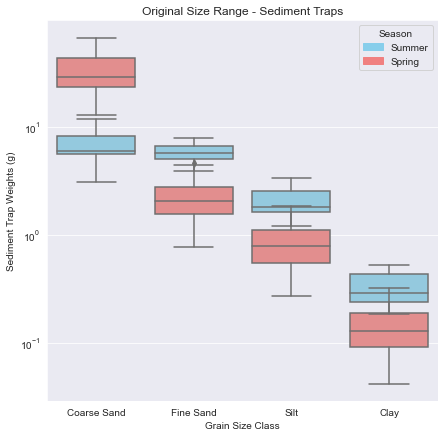

In [3]:
plt.figure(figsize=(7, 7))
sns.set_style("darkgrid")
sns.boxplot(data=trap_GSD_original, x='grain_size', y='sm_weight', color='skyblue')
sns.boxplot(data=trap_GSD_original, x='grain_size', y='sp_weight', color='lightcoral')
plt.xlabel('Grain Size Class')
plt.ylabel('Sediment Trap Weights (g)')
plt.yscale('log')

# create legend manually
legend_patches = [
    mpatches.Patch(color='skyblue', label='Summer'),
    mpatches.Patch(color='lightcoral', label='Spring')
]
plt.legend(handles=legend_patches, title="Season", loc="upper right")

plt.title('Original Size Range - Sediment Traps')
plt.savefig('results/original_size_range/original_size_range_traps.jpeg', dpi=300)
plt.show()

#### Water Column Samples

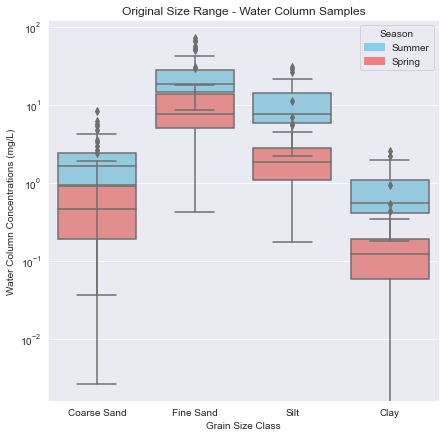

In [4]:
# define size class plotting order
grain_order = ['Coarse Sand', 'Fine Sand', 'Silt', 'Clay']
wc_GSD_original['grain_size'] = pd.Categorical(wc_GSD_original['grain_size'], categories=grain_order, ordered=True) 

plt.figure(figsize=(7, 7))
sns.set_style("darkgrid")
sns.boxplot(data=wc_GSD_original, x='grain_size', y='sm_conc', color='skyblue')
sns.boxplot(data=wc_GSD_original, x='grain_size', y='sp_conc', color='lightcoral')
plt.xlabel('Grain Size Class')
plt.ylabel('Water Column Concentrations (mg/L)')
plt.yscale('log')

# create legend manually
legend_patches = [
    mpatches.Patch(color='skyblue', label='Summer'),
    mpatches.Patch(color='lightcoral', label='Spring')
]
plt.legend(handles=legend_patches, title="Season", loc="upper right")

plt.title('Original Size Range - Water Column Samples')
plt.savefig('results/original_size_range/original_size_range_wc.jpeg', dpi=300)
plt.show()

#### Percentile Difference Calculations

Sediment Traps

In [5]:
# get size class arrays individually 
CS_SM = trap_GSD_original[trap_GSD_original['grain_size'] == 'Coarse Sand']["sm_weight"].values
CS_SP = trap_GSD_original[trap_GSD_original['grain_size'] == 'Coarse Sand']["sp_weight"].values
FS_SM = trap_GSD_original[trap_GSD_original['grain_size'] == 'Fine Sand']["sm_weight"].values
FS_SP = trap_GSD_original[trap_GSD_original['grain_size'] == 'Fine Sand']["sp_weight"].values
S_SM = trap_GSD_original[trap_GSD_original['grain_size'] == 'Silt']["sm_weight"].values
S_SP = trap_GSD_original[trap_GSD_original['grain_size'] == 'Silt']["sp_weight"].values
C_SM = trap_GSD_original[trap_GSD_original['grain_size'] == 'Clay']["sm_weight"].values
C_SP = trap_GSD_original[trap_GSD_original['grain_size'] == 'Clay']["sp_weight"].values

# sort the arrays 
CS_SM.sort()
CS_SP.sort()
FS_SM.sort()
FS_SP.sort()
S_SM.sort()
S_SP.sort()
C_SM.sort()
C_SP.sort()

# calculate the 25th, 50th, and 75th percentiles
CS_SM_25 = np.percentile(CS_SM, 25)
CS_SM_50 = np.percentile(CS_SM, 50)
CS_SM_75 = np.percentile(CS_SM, 75)
CS_SP_25 = np.percentile(CS_SP, 25)
CS_SP_50 = np.percentile(CS_SP, 50)
CS_SP_75 = np.percentile(CS_SP, 75)

FS_SM_25 = np.percentile(FS_SM, 25)
FS_SM_50 = np.percentile(FS_SM, 50)
FS_SM_75 = np.percentile(FS_SM, 75)
FS_SP_25 = np.percentile(FS_SP, 25)
FS_SP_50 = np.percentile(FS_SP, 50)
FS_SP_75 = np.percentile(FS_SP, 75)

S_SM_25 = np.percentile(S_SM, 25)
S_SM_50 = np.percentile(S_SM, 50)
S_SM_75 = np.percentile(S_SM, 75)
S_SP_25 = np.percentile(S_SP, 25)
S_SP_50 = np.percentile(S_SP, 50)
S_SP_75 = np.percentile(S_SP, 75)

C_SM_25 = np.percentile(C_SM, 25)
C_SM_50 = np.percentile(C_SM, 50)
C_SM_75 = np.percentile(C_SM, 75)
C_SP_25 = np.percentile(C_SP, 25)
C_SP_50 = np.percentile(C_SP, 50)
C_SP_75 = np.percentile(C_SP, 75)

# create a dataframe to export as table
summer_trap_percentiles = {
    'Size Class': ['Coarse Sand', 'Fine Sand', 'Silt', 'Clay'],
    'SM 25th Percentile': [CS_SM_25, FS_SM_25, S_SM_25, C_SM_25],
    'SM 50th Percentile': [CS_SM_50, FS_SM_50, S_SM_50, C_SM_50],
    'SM 75th Percentile': [CS_SM_75, FS_SM_75, S_SM_75, C_SM_75],
}
spring_trap_percentiles = {
    'Size Class': ['Coarse Sand', 'Fine Sand', 'Silt', 'Clay'],
    'SP 25th Percentile': [CS_SP_25, FS_SP_25, S_SP_25, C_SP_25],
    'SP 50th Percentile': [CS_SP_50, FS_SP_50, S_SP_50, C_SP_50],
    'SP 75th Percentile': [CS_SP_75, FS_SP_75, S_SP_75, C_SP_75],
}
summer_trap_percentiles = pd.DataFrame(summer_trap_percentiles)
spring_trap_percentiles = pd.DataFrame(spring_trap_percentiles)

Water Column

In [6]:
# get size class arrays individually 
CS_SM = wc_GSD_original[wc_GSD_original['grain_size'] == 'Coarse Sand']["sm_conc"].values
CS_SP = wc_GSD_original[wc_GSD_original['grain_size'] == 'Coarse Sand']["sp_conc"].values
FS_SM = wc_GSD_original[wc_GSD_original['grain_size'] == 'Fine Sand']["sm_conc"].values
FS_SP = wc_GSD_original[wc_GSD_original['grain_size'] == 'Fine Sand']["sp_conc"].values
S_SM = wc_GSD_original[wc_GSD_original['grain_size'] == 'Silt']["sm_conc"].values
S_SP = wc_GSD_original[wc_GSD_original['grain_size'] == 'Silt']["sp_conc"].values
C_SM = wc_GSD_original[wc_GSD_original['grain_size'] == 'Clay']["sm_conc"].values
C_SP = wc_GSD_original[wc_GSD_original['grain_size'] == 'Clay']["sp_conc"].values

# sort the arrays 
CS_SM.sort()
CS_SP.sort()
FS_SM.sort()
FS_SP.sort()
S_SM.sort()
S_SP.sort()
C_SM.sort()
C_SP.sort()

# calculate the 25th, 50th, and 75th percentiles
CS_SM_25 = np.percentile(CS_SM, 25)
CS_SM_50 = np.percentile(CS_SM, 50)
CS_SM_75 = np.percentile(CS_SM, 75)
CS_SP_25 = np.percentile(CS_SP, 25)
CS_SP_50 = np.percentile(CS_SP, 50)
CS_SP_75 = np.percentile(CS_SP, 75)

FS_SM_25 = np.percentile(FS_SM, 25)
FS_SM_50 = np.percentile(FS_SM, 50)
FS_SM_75 = np.percentile(FS_SM, 75)
FS_SP_25 = np.percentile(FS_SP, 25)
FS_SP_50 = np.percentile(FS_SP, 50)
FS_SP_75 = np.percentile(FS_SP, 75)

S_SM_25 = np.percentile(S_SM, 25)
S_SM_50 = np.percentile(S_SM, 50)
S_SM_75 = np.percentile(S_SM, 75)
S_SP_25 = np.percentile(S_SP, 25)
S_SP_50 = np.percentile(S_SP, 50)
S_SP_75 = np.percentile(S_SP, 75)

C_SM_25 = np.percentile(C_SM, 25)
C_SM_50 = np.percentile(C_SM, 50)
C_SM_75 = np.percentile(C_SM, 75)
C_SP_25 = np.percentile(C_SP, 25)
C_SP_50 = np.percentile(C_SP, 50)
C_SP_75 = np.percentile(C_SP, 75)

# create a dataframe to export as table
summer_wc_percentiles = {
    'Size Class': ['Coarse Sand', 'Fine Sand', 'Silt', 'Clay'],
    'SM 25th Percentile': [CS_SM_25, FS_SM_25, S_SM_25, C_SM_25],
    'SM 50th Percentile': [CS_SM_50, FS_SM_50, S_SM_50, C_SM_50],
    'SM 75th Percentile': [CS_SM_75, FS_SM_75, S_SM_75, C_SM_75],
}
spring_wc_percentiles = {
    'Size Class': ['Coarse Sand', 'Fine Sand', 'Silt', 'Clay'],
    'SP 25th Percentile': [CS_SP_25, FS_SP_25, S_SP_25, C_SP_25],
    'SP 50th Percentile': [CS_SP_50, FS_SP_50, S_SP_50, C_SP_50],
    'SP 75th Percentile': [CS_SP_75, FS_SP_75, S_SP_75, C_SP_75],
}
summer_wc_percentiles = pd.DataFrame(summer_wc_percentiles)
spring_wc_percentiles = pd.DataFrame(spring_wc_percentiles)

Plot for the paper

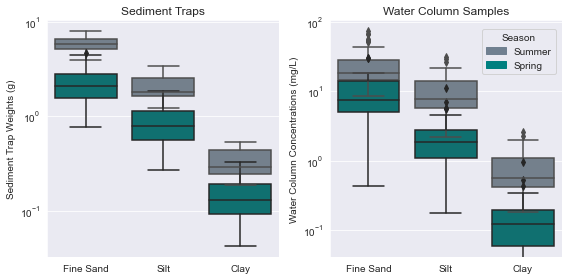

In [7]:
# excluding coarse
grain_order = ['Fine Sand', 'Silt', 'Clay']
trap_GSD_original = trap_GSD_original[trap_GSD_original['grain_size'].isin(grain_order)]
wc_GSD_original = wc_GSD_original[wc_GSD_original['grain_size'].isin(grain_order)]

# define size class plotting order
wc_GSD_original['grain_size'] = pd.Categorical(wc_GSD_original['grain_size'], categories=grain_order, ordered=True)
trap_GSD_original['grain_size'] = pd.Categorical(trap_GSD_original['grain_size'], categories=grain_order, ordered=True)

# set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=False)
sns.set_style("darkgrid")

# Plot Sediment Traps on the left
sns.boxplot(data=trap_GSD_original, x='grain_size', y='sm_weight', color='slategray', ax=axes[0])
sns.boxplot(data=trap_GSD_original, x='grain_size', y='sp_weight', color='teal', ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Sediment Trap Weights (g)')
axes[0].set_yscale('log')
axes[0].set_title('Sediment Traps')

# Plot Water Column Samples on the right
sns.boxplot(data=wc_GSD_original, x='grain_size', y='sm_conc', color='slategray', ax=axes[1])
sns.boxplot(data=wc_GSD_original, x='grain_size', y='sp_conc', color='teal', ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Water Column Concentrations (mg/L)')
axes[1].set_yscale('log')
axes[1].set_title('Water Column Samples')

# legend
legend_patches = [
    mpatches.Patch(color='slategray', label='Summer'),
    mpatches.Patch(color='teal', label='Spring')
]
legend = fig.legend(handles=legend_patches, title="Season", loc="upper right", bbox_to_anchor=(0.98, 0.9))

plt.tight_layout()
plt.savefig('results/original_size_range/original_size_range_combined.jpeg', dpi=300)
plt.show()


### New Size Range

#### Sediment Traps

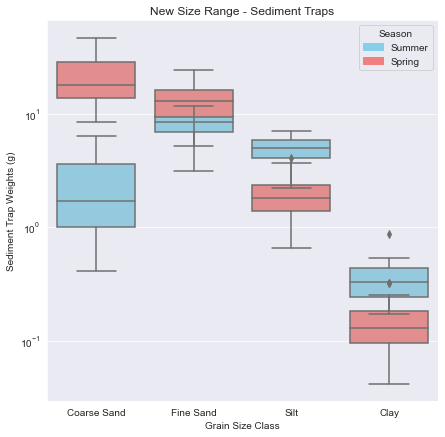

In [8]:
plt.figure(figsize=(7, 7))
sns.set_style("darkgrid")
sns.boxplot(data=trap_GSD_new, x='grain_size', y='sm_weight', color='skyblue')
sns.boxplot(data=trap_GSD_new, x='grain_size', y='sp_weight', color='lightcoral')
plt.xlabel('Grain Size Class')
plt.ylabel('Sediment Trap Weights (g)')
plt.yscale('log')

# create legend manually
legend_patches = [
    mpatches.Patch(color='skyblue', label='Summer'),
    mpatches.Patch(color='lightcoral', label='Spring')
]
plt.legend(handles=legend_patches, title="Season", loc="upper right")

plt.title('New Size Range - Sediment Traps')
plt.savefig('results/new_size_range/new_size_range_traps.jpeg', dpi=300)
plt.show()

#### Water Column Samples

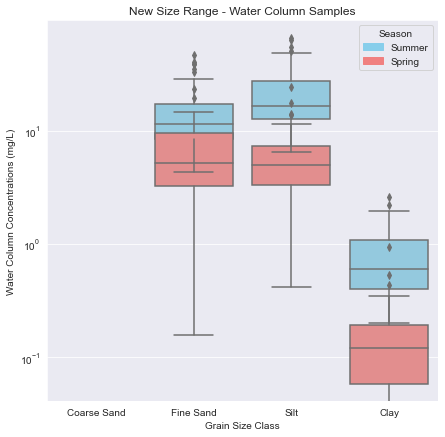

In [9]:
# define size class plotting order
grain_order = ['Coarse Sand', 'Fine Sand', 'Silt', 'Clay']
wc_GSD_new['grain_size'] = pd.Categorical(wc_GSD_new['grain_size'], categories=grain_order, ordered=True) 

plt.figure(figsize=(7, 7))
sns.set_style("darkgrid")
sns.boxplot(data=wc_GSD_new, x='grain_size', y='sm_conc', color='skyblue')
sns.boxplot(data=wc_GSD_new, x='grain_size', y='sp_conc', color='lightcoral')
plt.xlabel('Grain Size Class')
plt.ylabel('Water Column Concentrations (mg/L)')
plt.yscale('log')

# create legend manually
legend_patches = [
    mpatches.Patch(color='skyblue', label='Summer'),
    mpatches.Patch(color='lightcoral', label='Spring')
]
plt.legend(handles=legend_patches, title="Season", loc="upper right")

plt.title('New Size Range - Water Column Samples')
plt.savefig('results/new_size_range/new_size_range_wc.jpeg', dpi=300)
plt.show()

#### Percentile Difference Calculations

Sediment Traps

In [10]:
# get size class arrays individually 
CS_SM = trap_GSD_new[trap_GSD_new['grain_size'] == 'Coarse Sand']["sm_weight"].dropna().values
CS_SP = trap_GSD_new[trap_GSD_new['grain_size'] == 'Coarse Sand']["sp_weight"].dropna().values
FS_SM = trap_GSD_new[trap_GSD_new['grain_size'] == 'Fine Sand']["sm_weight"].dropna().values
FS_SP = trap_GSD_new[trap_GSD_new['grain_size'] == 'Fine Sand']["sp_weight"].dropna().values
S_SM = trap_GSD_new[trap_GSD_new['grain_size'] == 'Silt']["sm_weight"].dropna().values
S_SP = trap_GSD_new[trap_GSD_new['grain_size'] == 'Silt']["sp_weight"].dropna().values
C_SM = trap_GSD_new[trap_GSD_new['grain_size'] == 'Clay']["sm_weight"].dropna().values
C_SP = trap_GSD_new[trap_GSD_new['grain_size'] == 'Clay']["sp_weight"].dropna().values

# sort the arrays 
CS_SM.sort()
CS_SP.sort()
FS_SM.sort()
FS_SP.sort()
S_SM.sort()
S_SP.sort()
C_SM.sort()
C_SP.sort()

# calculate the 25th, 50th, and 75th percentiles
CS_SM_25 = np.percentile(CS_SM, 25)
CS_SM_50 = np.percentile(CS_SM, 50)
CS_SM_75 = np.percentile(CS_SM, 75)
CS_SP_25 = np.percentile(CS_SP, 25)
CS_SP_50 = np.percentile(CS_SP, 50)
CS_SP_75 = np.percentile(CS_SP, 75)

FS_SM_25 = np.percentile(FS_SM, 25)
FS_SM_50 = np.percentile(FS_SM, 50)
FS_SM_75 = np.percentile(FS_SM, 75)
FS_SP_25 = np.percentile(FS_SP, 25)
FS_SP_50 = np.percentile(FS_SP, 50)
FS_SP_75 = np.percentile(FS_SP, 75)

S_SM_25 = np.percentile(S_SM, 25)
S_SM_50 = np.percentile(S_SM, 50)
S_SM_75 = np.percentile(S_SM, 75)
S_SP_25 = np.percentile(S_SP, 25)
S_SP_50 = np.percentile(S_SP, 50)
S_SP_75 = np.percentile(S_SP, 75)

C_SM_25 = np.percentile(C_SM, 25)
C_SM_50 = np.percentile(C_SM, 50)
C_SM_75 = np.percentile(C_SM, 75)
C_SP_25 = np.percentile(C_SP, 25)
C_SP_50 = np.percentile(C_SP, 50)
C_SP_75 = np.percentile(C_SP, 75)

# create a dataframe to export as table
summer_trap_percentiles = {
    'Size Class': ['Coarse Sand', 'Fine Sand', 'Silt', 'Clay'],
    'SM 25th Percentile': [CS_SM_25, FS_SM_25, S_SM_25, C_SM_25],
    'SM 50th Percentile': [CS_SM_50, FS_SM_50, S_SM_50, C_SM_50],
    'SM 75th Percentile': [CS_SM_75, FS_SM_75, S_SM_75, C_SM_75],
}
spring_trap_percentiles = {
    'Size Class': ['Coarse Sand', 'Fine Sand', 'Silt', 'Clay'],
    'SP 25th Percentile': [CS_SP_25, FS_SP_25, S_SP_25, C_SP_25],
    'SP 50th Percentile': [CS_SP_50, FS_SP_50, S_SP_50, C_SP_50],
    'SP 75th Percentile': [CS_SP_75, FS_SP_75, S_SP_75, C_SP_75],
}
summer_trap_percentiles_new = pd.DataFrame(summer_trap_percentiles)
spring_trap_percentiles_new = pd.DataFrame(spring_trap_percentiles)

Water Column

In [11]:
# get size class arrays individually 
FS_SM = wc_GSD_new[wc_GSD_new['grain_size'] == 'Fine Sand']["sm_conc"].dropna().values
FS_SP = wc_GSD_new[wc_GSD_new['grain_size'] == 'Fine Sand']["sp_conc"].dropna().values
S_SM = wc_GSD_new[wc_GSD_new['grain_size'] == 'Silt']["sm_conc"].dropna().values
S_SP = wc_GSD_new[wc_GSD_new['grain_size'] == 'Silt']["sp_conc"].dropna().values
C_SM = wc_GSD_new[wc_GSD_new['grain_size'] == 'Clay']["sm_conc"].dropna().values
C_SP = wc_GSD_new[wc_GSD_new['grain_size'] == 'Clay']["sp_conc"].dropna().values

# sort the arrays 
FS_SM.sort()
FS_SP.sort()
S_SM.sort()
S_SP.sort()
C_SM.sort()
C_SP.sort()

# calculate the 25th, 50th, and 75th percentiles
FS_SM_25 = np.percentile(FS_SM, 25)
FS_SM_50 = np.percentile(FS_SM, 50)
FS_SM_75 = np.percentile(FS_SM, 75)
FS_SP_25 = np.percentile(FS_SP, 25)
FS_SP_50 = np.percentile(FS_SP, 50)
FS_SP_75 = np.percentile(FS_SP, 75)

S_SM_25 = np.percentile(S_SM, 25)
S_SM_50 = np.percentile(S_SM, 50)
S_SM_75 = np.percentile(S_SM, 75)
S_SP_25 = np.percentile(S_SP, 25)
S_SP_50 = np.percentile(S_SP, 50)
S_SP_75 = np.percentile(S_SP, 75)

C_SM_25 = np.percentile(C_SM, 25)
C_SM_50 = np.percentile(C_SM, 50)
C_SM_75 = np.percentile(C_SM, 75)
C_SP_25 = np.percentile(C_SP, 25)
C_SP_50 = np.percentile(C_SP, 50)
C_SP_75 = np.percentile(C_SP, 75)

# create a dataframe to export as table
summer_wc_percentiles = {
    'Size Class': ['Fine Sand', 'Silt', 'Clay'],
    'SM 25th Percentile': [FS_SM_25, S_SM_25, C_SM_25],
    'SM 50th Percentile': [FS_SM_50, S_SM_50, C_SM_50],
    'SM 75th Percentile': [FS_SM_75, S_SM_75, C_SM_75],
}
spring_wc_percentiles = {
    'Size Class': ['Fine Sand', 'Silt', 'Clay'],
    'SP 25th Percentile': [FS_SP_25, S_SP_25, C_SP_25],
    'SP 50th Percentile': [FS_SP_50, S_SP_50, C_SP_50],
    'SP 75th Percentile': [FS_SP_75, S_SP_75, C_SP_75],
}
summer_wc_percentiles_new = pd.DataFrame(summer_wc_percentiles)
spring_wc_percentiles_new = pd.DataFrame(spring_wc_percentiles)

### Cumulative Distributions

C:\Users\huck4481\AppData\Local\Temp\ipykernel_16388\473263406.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=percentiles, x=percentiles.index, y='sm_conc_50', color='skyblue', markers='o', linestyles='-',
C:\Users\huck4481\AppData\Local\Temp\ipykernel_16388\473263406.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=percentiles, x=percentiles.index, y='sp_conc_50', color='lightcoral', markers='o', linestyles='-',


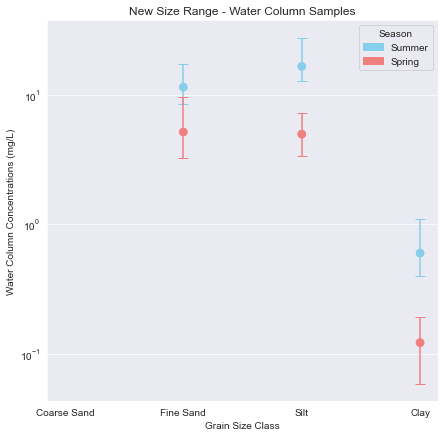

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Set the order of grain sizes
grain_order = ['Coarse Sand', 'Fine Sand', 'Silt', 'Clay']
wc_GSD_new['grain_size'] = pd.Categorical(wc_GSD_new['grain_size'], categories=grain_order, ordered=True) 

# Calculate the 25th, 50th, and 75th percentiles for both Summer and Spring
percentiles = wc_GSD_new.groupby('grain_size').agg(
    sm_conc_50=('sm_conc', 'median'),
    sm_conc_25=('sm_conc', lambda x: x.quantile(0.25)),
    sm_conc_75=('sm_conc', lambda x: x.quantile(0.75)),
    sp_conc_50=('sp_conc', 'median'),
    sp_conc_25=('sp_conc', lambda x: x.quantile(0.25)),
    sp_conc_75=('sp_conc', lambda x: x.quantile(0.75))
)

# Plot using pointplot
plt.figure(figsize=(7, 7))
sns.set_style("darkgrid")

# Plot for Summer (sm_conc) - 50th percentile as points, 25th and 75th as error bars
sns.pointplot(data=percentiles, x=percentiles.index, y='sm_conc_50', color='skyblue', markers='o', linestyles='-', 
              errwidth=2, capsize=5, join=False, ci=None)
plt.errorbar(percentiles.index, percentiles['sm_conc_50'], 
             yerr=[percentiles['sm_conc_50'] - percentiles['sm_conc_25'], percentiles['sm_conc_75'] - percentiles['sm_conc_50']], 
             fmt='o', color='skyblue', capsize=5)

# Plot for Spring (sp_conc) - 50th percentile as points, 25th and 75th as error bars
sns.pointplot(data=percentiles, x=percentiles.index, y='sp_conc_50', color='lightcoral', markers='o', linestyles='-', 
              errwidth=2, capsize=5, join=False, ci=None)
plt.errorbar(percentiles.index, percentiles['sp_conc_50'], 
             yerr=[percentiles['sp_conc_50'] - percentiles['sp_conc_25'], percentiles['sp_conc_75'] - percentiles['sp_conc_50']], 
             fmt='o', color='lightcoral', capsize=5)

# Set axis labels and log scale
plt.xlabel('Grain Size Class')
plt.ylabel('Water Column Concentrations (mg/L)')
plt.yscale('log')

# Create legend manually
legend_patches = [
    mpatches.Patch(color='skyblue', label='Summer'),
    mpatches.Patch(color='lightcoral', label='Spring')
]
plt.legend(handles=legend_patches, title="Season", loc="upper right")

plt.title('New Size Range - Water Column Samples')
plt.savefig('results/new_size_range/new_size_range_wc_pointplot.jpeg', dpi=300)
plt.show()



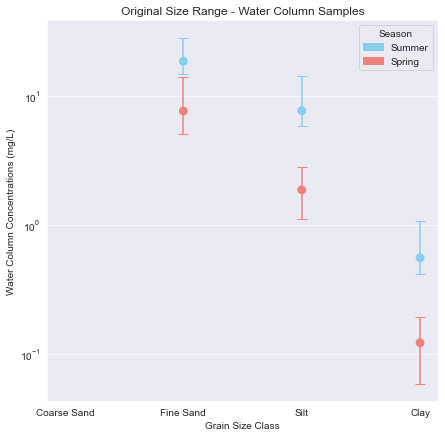

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Set the order of grain sizes
grain_order = ['Coarse Sand', 'Fine Sand', 'Silt', 'Clay']
wc_GSD_original['grain_size'] = pd.Categorical(wc_GSD_original['grain_size'], categories=grain_order, ordered=True) 

# Calculate the 25th, 50th, and 75th percentiles for both Summer and Spring
percentiles = wc_GSD_original.groupby('grain_size').agg(
    sm_conc_50=('sm_conc', 'median'),
    sm_conc_25=('sm_conc', lambda x: x.quantile(0.25)),
    sm_conc_75=('sm_conc', lambda x: x.quantile(0.75)),
    sp_conc_50=('sp_conc', 'median'),
    sp_conc_25=('sp_conc', lambda x: x.quantile(0.25)),
    sp_conc_75=('sp_conc', lambda x: x.quantile(0.75))
)

# Plot using pointplot
plt.figure(figsize=(7, 7))
sns.set_style("darkgrid")

# Plot for Summer (sm_conc) - 50th percentile as points, 25th and 75th as error bars
sns.pointplot(data=percentiles, x=percentiles.index, y='sm_conc_50', color='skyblue', markers='o', linestyles='-', 
              errwidth=2, capsize=5, join=False, errorbar=None)
plt.errorbar(percentiles.index, percentiles['sm_conc_50'], 
             yerr=[percentiles['sm_conc_50'] - percentiles['sm_conc_25'], percentiles['sm_conc_75'] - percentiles['sm_conc_50']], 
             fmt='o', color='skyblue', capsize=5)

# Plot for Spring (sp_conc) - 50th percentile as points, 25th and 75th as error bars
sns.pointplot(data=percentiles, x=percentiles.index, y='sp_conc_50', color='lightcoral', markers='o', linestyles='-', 
              errwidth=2, capsize=5, join=False, errorbar=None)
plt.errorbar(percentiles.index, percentiles['sp_conc_50'], 
             yerr=[percentiles['sp_conc_50'] - percentiles['sp_conc_25'], percentiles['sp_conc_75'] - percentiles['sp_conc_50']], 
             fmt='o', color='lightcoral', capsize=5)

# Set axis labels and log scale
plt.xlabel('Grain Size Class')
plt.ylabel('Water Column Concentrations (mg/L)')
plt.yscale('log')

# Create legend manually
legend_patches = [
    mpatches.Patch(color='skyblue', label='Summer'),
    mpatches.Patch(color='lightcoral', label='Spring')
]
plt.legend(handles=legend_patches, title="Season", loc="upper right")

plt.title('Original Size Range - Water Column Samples')
plt.savefig('results/original_size_range/original_size_range_wc_pointplot.jpeg', dpi=300)
plt.show()
